In [248]:
import torch
from numpy import asarray,stack,concatenate,convolve,ones,arange,stack,log,histogram,maximum
from glob import glob
from XRDXRFutils import DataXRF
import numpy as np

from matplotlib.pyplot import plot,semilogx,semilogy,subplots,legend,fill_between,xlim,ylim,imshow,subplots,grid,subplots_adjust
import re

In [3]:
def read_images(path):
    checkpoints = sorted(glob(path + '/*.pth'))

    images = []
    for checkpoint in checkpoints:
        images += [torch.load(checkpoint,map_location=torch.device('cpu'))['image']]

    return images

In [186]:
images = read_images('../run/ResNet1_0_2/')
data_elgreco = DataXRF().load_h5('F:/andrea/AIdataXRF/downsample6_elgreco_weighted_1024_with_labels.h5')
data_giulia = DataXRF().load_h5('F:/andrea/AIdataXRF/downsample6_giulia_weighted_1024_with_labels.h5')
data_henry = DataXRF().load_h5('F:/andrea/AIdataXRF/downsample9_henryVII_x1024_with_labels.h5')

images_nowarm = read_images('../run/ResNet1_0_3/')
data_elgreco_nowarm = DataXRF().load_h5('F:/andrea/AIdataXRF/downsample6_elgreco_weighted_1024_with_labels.h5')
data_giulia_nowarm = DataXRF().load_h5('F:/andrea/AIdataXRF/downsample6_giulia_weighted_1024_with_labels.h5')
data_henry_nowarm = DataXRF().load_h5('F:/andrea/AIdataXRF/downsample9_henryVII_x1024_with_labels.h5')

Loading: F:/andrea/AIdataXRF/downsample6_elgreco_weighted_1024_with_labels.h5
Loading: F:/andrea/AIdataXRF/downsample6_giulia_weighted_1024_with_labels.h5
Loading: F:/andrea/AIdataXRF/downsample9_henryVII_x1024_with_labels.h5
Loading: F:/andrea/AIdataXRF/downsample6_elgreco_weighted_1024_with_labels.h5
Loading: F:/andrea/AIdataXRF/downsample6_giulia_weighted_1024_with_labels.h5
Loading: F:/andrea/AIdataXRF/downsample9_henryVII_x1024_with_labels.h5


In [187]:
giulia, elgreco, henry = images[-1]
giulia.shape,elgreco.shape,henry.shape

giulia_nowarm, elgreco_nowarm, henry_nowarm = images_nowarm[-1]
giulia_nowarm.shape,elgreco_nowarm.shape,henry_nowarm.shape

((70, 70, 5), (67, 120, 5), (82, 71, 5))

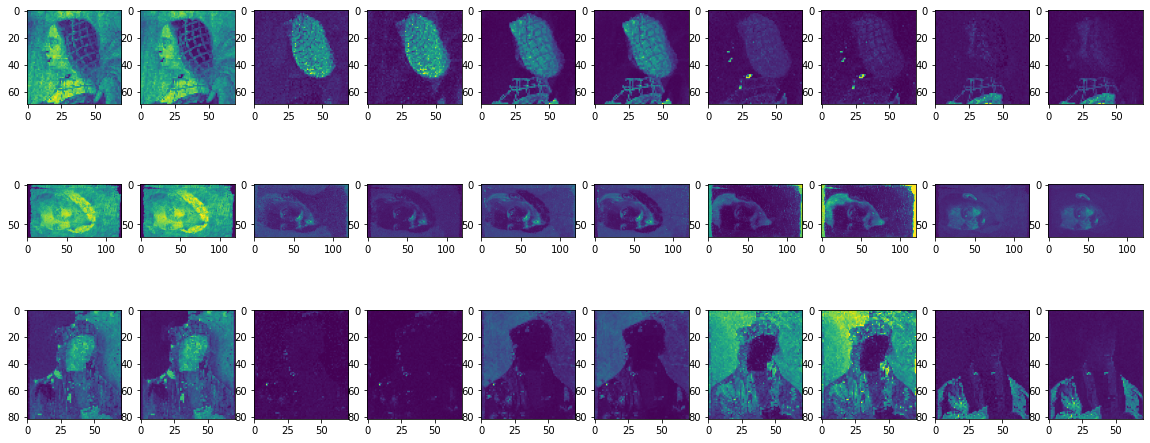

In [178]:
%matplotlib inline
fig,ax = subplots(3,10,figsize=(20,8))
for i in range(5):

    ax[0,2*i].imshow(giulia[:,:,i],vmin=0,vmax = giulia[:,:,i].max())
    ax[1,2*i].imshow(elgreco[:,:,i],vmin=0,vmax = elgreco[:,:,i].max())
    ax[2,2*i].imshow(henry[:,:,i],vmin=0,vmax = henry[:,:,i].max())

    ax[0,2*i+1].imshow(data_giulia.labels[:,:,i],vmin=0,vmax = giulia[:,:,i].max())
    ax[1,2*i+1].imshow(data_elgreco.labels[:,:,i],vmin=0,vmax = elgreco[:,:,i].max())
    ax[2,2*i+1].imshow(data_henry.labels[:,:,i],vmin=0,vmax = henry[:,:,i].max())

In [235]:
%matplotlib qt
elgreco_labels = data_elgreco.labels.reshape(-1,5)
giulia_labels = data_giulia.labels.reshape(-1,5)
henry_labels = data_henry.labels.reshape(-1,5)

elgreco_model = elgreco.reshape(-1,5)
giulia_model = giulia.reshape(-1,5)
henry_model = henry.reshape(-1,5)

elgreco_nowarm_model = elgreco_nowarm.reshape(-1,5)
giulia_nowarm_model = giulia_nowarm.reshape(-1,5)
henry_nowarm_model = henry_nowarm.reshape(-1,5)

fig,ax = subplots(5,3,figsize=(12,12))
ax[0,0].set_title('giulia')
ax[0,1].set_title('elgreco')
ax[0,2].set_title('henry')

for i in range(5):
    m = maximum(giulia_labels.max(axis=0),giulia_model.max(axis=0), giulia_nowarm_model.max(axis=0))
    
    ry,rx = histogram(giulia_labels[:,i],bins=150,range=(0,m[i]))
    iy,ix = histogram(giulia_model[:,i],bins=150,range=(0,m[i]))
    wy,wx = histogram(giulia_nowarm_model[:,i],bins=150,range=(0,m[i]))

    ax[i,0].plot(rx[:-1],ry, label='giulia label')
    ax[i,0].plot(wx[:-1],wy, label='nowarm model')
    ax[i,0].plot(ix[:-1],iy, label='warmed model')
    ax[i,0].legend(frameon=True)
    ax[i,0].grid(True)
    
    m = maximum(elgreco_labels.max(axis=0),elgreco_model.max(axis=0))
                
    ry,rx = histogram((elgreco_labels[:,i]),bins=150,range=(0,m[i]))
    iy,ix = histogram((elgreco_model[:,i]),bins=150,range=(0,m[i]))
    wy,wx = histogram(elgreco_nowarm_model[:,i],bins=150,range=(0,m[i]))

    ax[i,1].plot(rx[:-1],ry, label="elgreco label")
    ax[i,1].plot(wx[:-1],wy, label='nowarm model')
    ax[i,1].plot(ix[:-1],iy, label="warmed model")
    ax[i,1].legend(frameon=True)
    ax[i,1].grid(True)
    
    m = maximum(henry_labels.max(axis=0),henry_model.max(axis=0))
    
    ry,rx = histogram(henry_labels[:,i],bins=150,range=(0,m[i]))
    iy,ix = histogram(henry_model[:,i],bins=150,range=(0,m[i]))
    wy,wx = histogram(henry_nowarm_model[:,i],bins=150,range=(0,m[i]))

    ax[i,2].plot(rx[:-1],ry, label='henry label')
    ax[i,2].plot(wx[:-1],wy, label='nowarm model')
    ax[i,2].plot(ix[:-1],iy, label='warmed model')
    ax[i,2].legend(frameon=True)
    ax[i,2].grid(True)

In [262]:
%matplotlib qt
maxes, mins = None, None
for col in range(elgreco_labels.shape[-1]):
    maxes = np.maximum(elgreco_nowarm.reshape((-1, 5))[:,col],elgreco_labels[:,col])
    mins = np.minimum(elgreco_nowarm.reshape((-1, 5))[:,col],elgreco_labels[:,col])
    m=np.max(elgreco_nowarm[:,col])
    m1 = np.max(elgreco_labels[:,col])
    m = max(m,m1)
    
    # res = mins/maxes
    diff = np.abs(elgreco_nowarm.reshape((-1, 5))[:,col] - elgreco_labels[:,col])
    score = 1-diff/m

    fig, ax = subplots(3,2, figsize=(10.5,10))
    fig.suptitle("element:" + str(col))
    for r in range(3):
        for c in range(2):
            ax[r, c].set_yticklabels([])
            ax[r, c].set_xticklabels([])
            ax[r, c].axis('off')
    subplots_adjust(wspace=0, hspace=0)

    ax[0,0].set_title('labels')
    ax[0,0].imshow(elgreco_labels[:,col].reshape(elgreco_nowarm.shape[0], elgreco_nowarm.shape[1]), cmap='copper', vmin=0)
    ax[0,1].set_visible(False)

    ax[1,0].set_title('nowarm model')
    ax[1,0].imshow(elgreco_nowarm[:,:,col], cmap='copper', vmin=0)

    ax[1,1].set_title('score')
    ax[1,1].imshow(score.reshape(elgreco_nowarm.shape[0], elgreco_nowarm.shape[1]), cmap='copper', vmin=0)

    ax[2,0].set_title('warmed model')
    ax[2,0].imshow(elgreco[:,:,col], cmap='copper', vmin=0)

    ax[2,1].set_title('score')
    ax[2,1].imshow(score.reshape(elgreco.shape[0], elgreco.shape[1]), cmap='copper', vmin=0)
    
    fig.savefig('C:/Users/busac/AndreaFolder/NetsXRF/notebooks/warm_vs_nowarm_score_element_' + str(col)+'.pdf', format='pdf')

    print('\nSCORE AVERAGE', np.mean(score),'\nSCORE MAX',  np.max(score),'\nSCORE MIN',  np.min(score))
    max_range = int(np.max(elgreco_nowarm[:,:,col]))
    ran = (0, max_range)
    n_bins = max_range

    fig, ax = subplots(2, figsize=(20,10))
    subplots_adjust(wspace=0, hspace=0)

    ax[0].set_title('nowarm model - element: '+str(col))
    # print(elgreco_labels[:,col].shape, max_range)
    label_hist,label_bins = histogram(elgreco_labels[:,col], bins=150, range=ran)
    ax[0].plot(label_bins[:-1],label_hist, marker='.', label='labels')

    # print(elgreco_nowarm[:,:,col].shape)
    model_hist_nowarm,model_bins_nowarm = histogram(elgreco_nowarm[:,:,col],bins=150, range=ran)
    ax[0].plot(model_bins_nowarm[:-1], model_hist_nowarm, marker='.', label='nowarm model')

    # print(model_hist.shape, label_hist.shape)
    diff_hist_nowarm = np.sqrt((model_hist_nowarm-label_hist)**2)
    ax[0].plot(label_bins[:-1],diff_hist_nowarm, marker='.', label='|labels - model nowarm|')
    
    ax[1].set_title('warmed model - element: ' + str(col))
    model_hist,model_bins = histogram(elgreco[:,:,col],bins=150, range=ran)
    
    diff_hist = np.sqrt((model_hist-label_hist)**2)
    
    ax[1].plot(label_bins[:-1],label_hist, marker='.', label='labels')
    ax[1].plot(model_bins[:-1], model_hist, marker='.', label='warmed model')
    ax[1].plot(label_bins[:-1], diff_hist, marker='.', label='|labels - warmed model|')
    
    fig.savefig('C:/Users/busac/AndreaFolder/NetsXRF/notebooks/warm_vs_nowarm_difference_histogram_element_' + str(col)+'.pdf', format='pdf')
    
    ax[0].legend()
    ax[0].grid(True)
    ax[1].legend()
    ax[1].grid(True)


SCORE AVERAGE 0.98250836 
SCORE MAX 0.9999962 
SCORE MIN 0.9404194

SCORE AVERAGE 0.98868984 
SCORE MAX 0.9999997 
SCORE MIN 0.86863637

SCORE AVERAGE 0.9801251 
SCORE MAX 0.9999991 
SCORE MIN 0.8699561

SCORE AVERAGE 0.94928575 
SCORE MAX 0.99119574 
SCORE MIN 0.5998831

SCORE AVERAGE 0.99555403 
SCORE MAX 0.9999995 
SCORE MIN 0.97797483
